In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

# File reading function

In [33]:
def read_file(filename):
    file = open(filename, "r")
    lines = file.readlines()
    file.close()    
    # x: each execution finish time
    # y: finished query count
    # z: each execution time in ms
    x = lines[0].split(",")
    y = lines[1].split(",")
    z = lines[2].split(",")
    x = [int(item) / 1000 for item in x]
    y = [int(item) for item in y]
    z = [int(item) / 1000 for item in z]
    exec_time = int(lines[3]) / 1000
    replan_time = int(lines[4]) / 1000
    overhead_time = int(lines[5]) / 1000
    return [x, y, z, exec_time, replan_time + overhead_time]

# Drawing helpers

In [46]:
def draw_exec_count_line(files, type):
    plt.title("Finished query number for {} stmts".format(type))
    plt.xlabel("Time (ms)")
    plt.ylabel("Count")
    plt.plot(files[0][0], files[0][1], label = "ours")
    plt.plot(files[1][0], files[1][1], label = "pg")
    plt.plot(files[2][0], files[2][1], label = "force_replan")
    plt.legend()
    plt.show()

In [47]:
def draw_exec_time_scatter(files, type):
    plt.title("Execution time for {} stmts".format(type))
    plt.xlabel("Time (ms)")
    plt.ylabel("Time (ms)")
    plt.plot(files[0][0], files[0][2], label = "ours")
    plt.plot(files[1][0], files[1][2], label = "pg")
    plt.plot(files[2][0], files[2][2], label = "force_replan")
    plt.legend()
    plt.show()

In [56]:
def draw_exec_bar(all_file):
    df = pd.DataFrame(columns=['system','type','val'])
    systems = ["ours", "pg", "force-replan"]
    types = ["type1", "type2", "type3", "mixed"]
    for i in range(len(systems)):
        for j in range(len(types)):
            df.loc[len(df.index)] = [systems[i], types[j], all_file[j][i][3]]

    df.pivot("system", "type", "val").plot(kind='bar')
    plt.title("Execution time")
    plt.ylabel("Time (ms)")
    plt.legend(loc=(1.04,0))
    plt.show()

In [57]:
def draw_replan_bar(all_file):
    df = pd.DataFrame(columns=['system','type','val'])
    systems = ["ours", "pg", "force-replan"]
    types = ["type1", "type2", "type3", "mixed"]
    for i in range(len(systems)):
        for j in range(len(types)):
            df.loc[len(df.index)] = [systems[i], types[j], all_file[j][i][4]]

    df.pivot("system", "type", "val").plot(kind='bar')
    plt.title("Replan time")
    plt.ylabel("Time (ms)")
    plt.legend(loc=(1.04,0))
    plt.show()

# Main logic

In [37]:
file_name = "./data/type{}_{}_result_processed.txt"
file_sets = []
for i in range(1, 5):
    tmp = []
    for j in range(1, 4):
        tmp.append(file_name.format(j, i))
    file_sets.append(tmp)

In [38]:
# Read all files
all_file = []
for file_set in file_sets:
    files = []
    for file_path in file_set:
        files.append(read_file(file_path))
    all_file.append(files)

In [44]:
len(all_file)

4

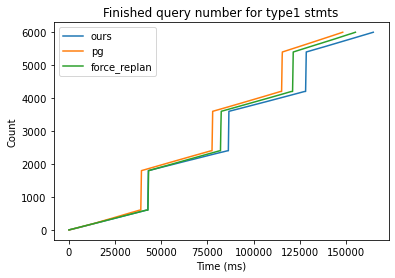

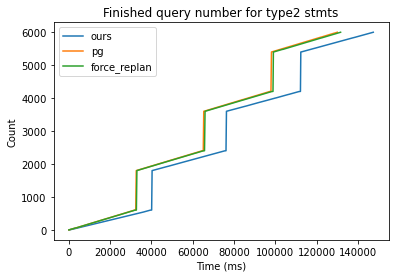

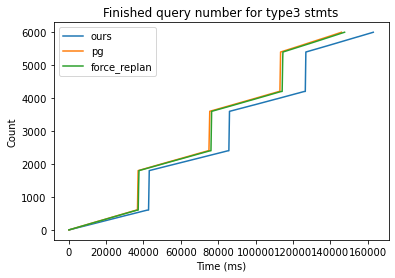

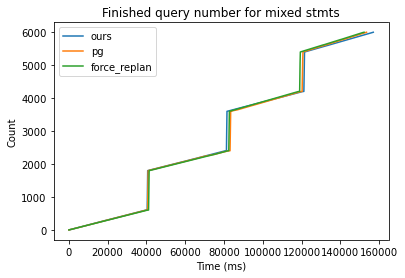

In [48]:
types = ["type1", "type2", "type3", "mixed"]
for i in range(len(types)):
    draw_exec_count_line(all_file[i], types[i])
    plt.show()

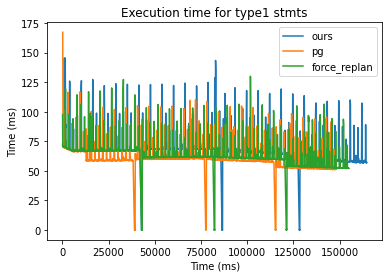

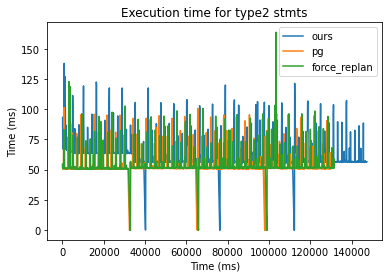

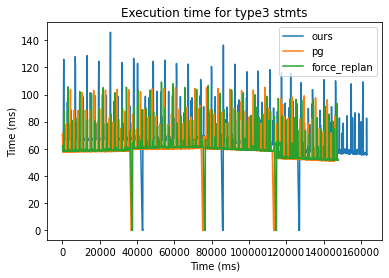

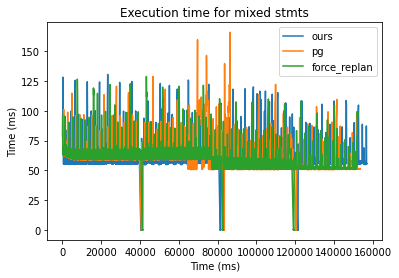

In [50]:
types = ["type1", "type2", "type3", "mixed"]
for i in range(len(types)):
    draw_exec_time_scatter(all_file[i], types[i])

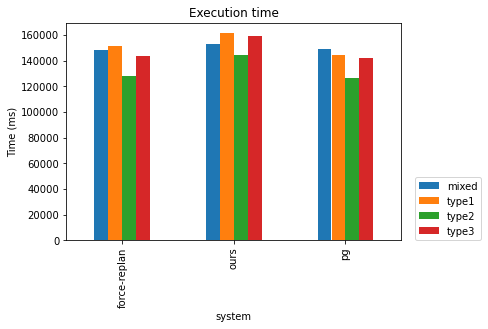

In [58]:
draw_exec_bar(all_file)

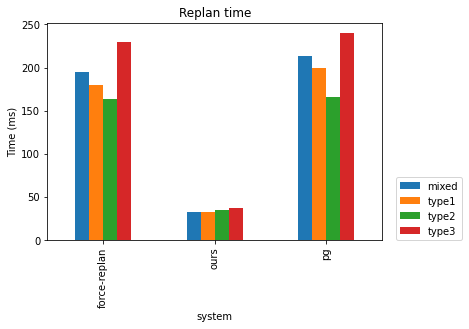

In [59]:
draw_replan_bar(all_file)